# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import altair as alt

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

#**Loading Dataset**

In [3]:
!gdown --id  1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh

Downloading...
From: https://drive.google.com/uc?id=1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh
To: /content/Ipl_dataset.zip
100% 2.58M/2.58M [00:00<00:00, 175MB/s]


In [4]:
!unzip '/content/Ipl_dataset.zip' -d '/content/data'

Archive:  /content/Ipl_dataset.zip
  inflating: /content/data/IPL Matches 2008-2020.csv  
  inflating: /content/data/IPL Ball-by-Ball 2008-2020.csv  
  inflating: /content/data/deliveries.csv  
  inflating: /content/data/matches.csv  


In [5]:
df_ball_by_ball = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
df_ball_by_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
df_IPL_matches = pd.read_csv("/content/data/matches.csv")
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df_deliveries = pd.read_csv("/content/data/deliveries.csv")
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
df_IPL_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df_IPL_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# **Data Cleaning**

In [78]:
#Removing column with most null values
df_IPL_matches.drop(["umpire3"], axis = 1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,5,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,3,0,7,SPD Smith,21,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,11,0,10,CA Lynn,31,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,9,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,4,15,0,KM Jadhav,17,NaN,NaN,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,11347,2019,Mumbai,05/05/19,7,8,8,field,normal,0,12,0,9,HH Pandya,40,Nanda Kishore,O Nandan,0.0,0.0,0
748,11412,2019,Chennai,07/05/19,0,8,0,bat,normal,0,12,0,6,AS Yadav,18,Nigel Llong,Nitin Menon,0.0,1.0,1
749,11413,2019,Visakhapatnam,08/05/19,13,2,2,field,normal,0,6,0,2,RR Pant,0,NaN,NaN,0.0,0.0,0
750,11414,2019,Visakhapatnam,10/05/19,2,0,0,field,normal,0,0,0,6,F du Plessis,0,Sundaram Ravi,Bruce Oxenford,0.0,0.0,0


In [79]:
#Filling the values of city based on venue
conditions = [df_IPL_matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",df_IPL_matches["venue"] == "Maharashtra Cricket Association Stadium",
              df_IPL_matches["venue"] == "Saurashtra Cricket Association Stadium", df_IPL_matches["venue"] == "Holkar Cricket Stadium",
              df_IPL_matches["venue"] == "M Chinnaswamy Stadium",df_IPL_matches["venue"] == "Wankhede Stadium",
              df_IPL_matches["venue"] == "Eden Gardens",df_IPL_matches["venue"] == "Feroz Shah Kotla",
              df_IPL_matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df_IPL_matches["venue"] == "Green Park",
              df_IPL_matches["venue"] == "Punjab Cricket Association Stadium, Mohali",df_IPL_matches["venue"] == "Dr DY Patil Sports Academy",
              df_IPL_matches["venue"] == "Sawai Mansingh Stadium", df_IPL_matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df_IPL_matches["venue"] == "Newlands", df_IPL_matches["venue"] == "St George's Park" , 
              df_IPL_matches["venue"] == "Kingsmead", df_IPL_matches["venue"] == "SuperSport Park",
              df_IPL_matches["venue"] == "Buffalo Park", df_IPL_matches["venue"] == "New Wanderers Stadium",
              df_IPL_matches["venue"] == "De Beers Diamond Oval", df_IPL_matches["venue"] == "OUTsurance Oval", 
              df_IPL_matches["venue"] == "Brabourne Stadium",df_IPL_matches["venue"] == "Sardar Patel Stadium", 
              df_IPL_matches["venue"] == "Barabati Stadium", df_IPL_matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df_IPL_matches["venue"] == "Himachal Pradesh Cricket Association Stadium",df_IPL_matches["venue"] == "Nehru Stadium",
              df_IPL_matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df_IPL_matches["venue"] == "Subrata Roy Sahara Stadium",
              df_IPL_matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",df_IPL_matches["venue"] == "JSCA International Stadium Complex",
              df_IPL_matches["venue"] == "Sheikh Zayed Stadium",df_IPL_matches["venue"] == "Sharjah Cricket Stadium",
              df_IPL_matches["venue"] == "Dubai International Cricket Stadium",df_IPL_matches["venue"] == "M. A. Chidambaram Stadium",
              df_IPL_matches["venue"] == "Feroz Shah Kotla Ground",df_IPL_matches["venue"] == "M. Chinnaswamy Stadium",
              df_IPL_matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df_IPL_matches["venue"] == "IS Bindra Stadium",df_IPL_matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df_IPL_matches['city'] = np.where(df_IPL_matches['city'].isnull(),
                              np.select(conditions, values),
                              df_IPL_matches['city'])

#Removing records having null values in "winner" column
df_IPL_matches=df_IPL_matches[df_IPL_matches["winner"].notna()]
df_IPL_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,5,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,3,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,11,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,9,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,4,15,0,KM Jadhav,17,NaN,NaN,NaN,1.0,1.0,1


In [80]:
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
team1_win            0
team1_toss_win       0
team1_bat            0
dtype: int64

In [81]:
#checking unique elements
for team in df_IPL_matches['team1'].unique():
    print(team)


13
8
4
11
12
7
3
5
0
10
1
6
9
2


In [82]:
for team in df_IPL_matches['team2'].unique():
    print(team)
## Similarly same anomaly could be found in winner & toss_winner Columns

12
11
7
5
3
13
8
4
10
0
1
9
6
2


In [83]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df_IPL_matches["team2"]=df_IPL_matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["team1"]=df_IPL_matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["winner"]=df_IPL_matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["toss_winner"]=df_IPL_matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
#####
for team in df_IPL_matches['team1'].unique():
    print(team)


13
8
4
11
12
7
3
5
0
10
1
6
9
2


In [84]:
df_IPL_matches_2 = df_IPL_matches


In [85]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_IPL_matches["team1"]=encoder.fit_transform(df_IPL_matches["team1"])
df_IPL_matches["team2"]=encoder.fit_transform(df_IPL_matches["team2"])
df_IPL_matches["winner"]=encoder.fit_transform(df_IPL_matches["winner"].astype(str))
df_IPL_matches["toss_winner"]=encoder.fit_transform(df_IPL_matches["toss_winner"])
df_IPL_matches["venue"]=encoder.fit_transform(df_IPL_matches["venue"])
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,1.0,1.0,1


In [86]:
#outcome variable team1_win as a probability of team1 winning the match
df_IPL_matches.loc[df_IPL_matches["winner"]==df_IPL_matches["team1"],"team1_win"]=1
df_IPL_matches.loc[df_IPL_matches["winner"]!=df_IPL_matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
df_IPL_matches.loc[df_IPL_matches["toss_winner"]==df_IPL_matches["team1"],"team1_toss_win"]=1
df_IPL_matches.loc[df_IPL_matches["toss_winner"]!=df_IPL_matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
df_IPL_matches["team1_bat"]=0
df_IPL_matches.loc[(df_IPL_matches["team1_toss_win"]==1) & (df_IPL_matches["toss_decision"]=="bat"),"team1_bat"]=1
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


In [87]:
#Resetiing Index Value
df_IPL_matches= df_IPL_matches.reset_index(drop=True)
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


In [88]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_IPL_matches["team1"]=encoder.fit_transform(df_IPL_matches["team1"])
df_IPL_matches["team2"]=encoder.fit_transform(df_IPL_matches["team2"])
df_IPL_matches["winner"]=encoder.fit_transform(df_IPL_matches["winner"].astype(str))
df_IPL_matches["toss_winner"]=encoder.fit_transform(df_IPL_matches["toss_winner"])
df_IPL_matches["venue"]=encoder.fit_transform(df_IPL_matches["venue"])
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,12,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


#**Predicting Winner of the match( Classification Analysis)**

In [90]:
#dataframe of related features
prediction_df=df_IPL_matches[["venue","team1","team2","team1_toss_win","team1_bat","team1_win"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,venue,team1,team2,team1_toss_win,team1_win
0,28,13,12,0.0,0.0
1,21,8,11,0.0,0.0
2,31,4,7,0.0,0.0
3,13,11,5,0.0,0.0
4,17,12,3,1.0,0.0
...,...,...,...,...,...
747,40,7,8,0.0,0.0
748,18,0,8,1.0,0.0
749,0,13,2,0.0,0.0
750,0,2,0,0.0,0.0


In [91]:
X = prediction_df.drop([ 'team1_win'], axis=1)
X

,venue,team1,team2,team1_toss_win,team1_bat
0,28,13,12,0.0,0
1,21,8,11,0.0,0
2,31,4,7,0.0,0
3,13,11,5,0.0,0
4,17,12,3,1.0,1
...,...,...,...,...,...
747,40,7,8,0.0,0
748,18,0,8,1.0,1
749,0,13,2,0.0,0
750,0,2,0,0.0,0


In [92]:
y = prediction_df['team1_win']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
747    0.0
748    0.0
749    0.0
750    0.0
751    0.0
Name: team1_win, Length: 752, dtype: float64

In [93]:
X.shape

(752, 5)

In [94]:
y.shape

(752,)

In [95]:
# Data Scalimg
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.7       , 1.        , 0.92307692, 0.        , 0.        ],
       [0.525     , 0.61538462, 0.84615385, 0.        , 0.        ],
       [0.775     , 0.30769231, 0.53846154, 0.        , 0.        ],
       ...,
       [0.        , 1.        , 0.15384615, 0.        , 0.        ],
       [0.        , 0.15384615, 0.        , 0.        , 0.        ],
       [0.725     , 0.61538462, 0.        , 1.        , 1.        ]])

In [96]:
scaler.data_max_

array([40., 13., 13.,  1.,  1.])

In [97]:
scaler.data_min_

array([0., 0., 0., 0., 0.])

In [98]:
y = y.values.reshape(-1,1)
y.shape


(752, 1)

In [99]:
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [100]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.2)

In [101]:
X_train.shape

(601, 5)

In [102]:
X_test.shape

(151, 5)

In [103]:
y_train.shape

(601, 1)

In [104]:
y_test.shape

(151, 1)

In [190]:
#ANN model summary with all the trainable parametres
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 10)                60        
                                                                 
 dense_53 (Dense)            (None, 5)                 55        
                                                                 
 dense_54 (Dense)            (None, 1)                 6         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [192]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [193]:
#Data Training
epochs_hist=model.fit(X_train, y_train, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/25
96/96 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1415
Epoch 2/25
96/96 [==============================] - 0s 2ms/step - loss: 0.1107 - val_loss: 0.1325
Epoch 3/25
96/96 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.1248
Epoch 4/25
96/96 [==============================] - 0s 3ms/step - loss: 0.0982 - val_loss: 0.1215
Epoch 5/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0951 - val_loss: 0.1204
Epoch 6/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0924 - val_loss: 0.1188
Epoch 7/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0886 - val_loss: 0.1143
Epoch 8/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0851 - val_loss: 0.1152
Epoch 9/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0840 - val_loss: 0.1099
Epoch 10/25
96/96 [==============================] - 0s 2ms/step - loss: 0.0807 - val_loss: 0.1093
Epoch 11/25
96/96 [

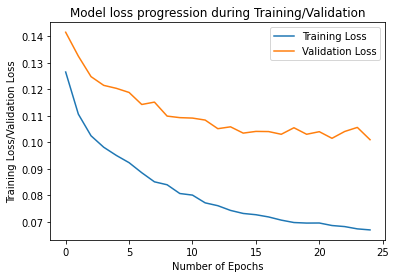

In [194]:
#Data plotting between training and validation loss
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progression during Training/Validation')
plt.ylabel('Training Loss/Validation Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

In [195]:
X_Testing=X_test

In [196]:
y_predict = model.predict(X_Testing)
y_predict.shape

(151, 1)

In [197]:
print('Accuracy on test set for predicting the winner of the match:' ,  r2_score(y_test, y_predict)*100 ,"%" )

Accuracy on test set for predicting the winner of the match: 27.961862472755605 %


# **Predicting Final Score of the match(Regression Analysis)**

In [45]:
!gdown --id  1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT

Downloading...
From: https://drive.google.com/uc?id=1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT
To: /content/ipl.csv
100% 9.48M/9.48M [00:00<00:00, 275MB/s]


In [46]:
dataset = pd.read_csv('/content/ipl.csv')
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [47]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
dataset["bowl_team"]=encoder.fit_transform(dataset["bowl_team"])
dataset["bat_team"]=encoder.fit_transform(dataset["bat_team"])
dataset["bowler"]=encoder.fit_transform(dataset["bowler"])
dataset["batsman"]=encoder.fit_transform(dataset["batsman"])
dataset["venue"]=encoder.fit_transform(dataset["venue"])
dataset.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,14,6,12,61,201,2,0,0.4,2,0,0,0,222


In [48]:
X_1 = dataset.copy()
X_1 = X_1.drop(["mid" , "date" , "runs_last_5" , "wickets_last_5"] , axis = 1)
X_1

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker,total
0,14,6,12,328,201,1,0,0.1,0,0,222
1,14,6,12,61,201,1,0,0.2,0,0,222
2,14,6,12,61,201,2,0,0.2,0,0,222
3,14,6,12,61,201,2,0,0.3,0,0,222
4,14,6,12,61,201,2,0,0.4,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...
76009,23,7,10,172,96,121,7,19.2,40,12,129
76010,23,7,10,172,96,127,7,19.3,46,12,129
76011,23,7,10,172,96,128,7,19.4,47,12,129
76012,23,7,10,215,96,129,7,19.5,47,13,129


In [49]:
y_1 = dataset["total"]
y_1 

0        222
1        222
2        222
3        222
4        222
        ... 
76009    129
76010    129
76011    129
76012    129
76013    129
Name: total, Length: 76014, dtype: int64

In [50]:
X_1.shape

(76014, 11)

In [51]:
y_1.shape

(76014,)

In [52]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_1)
X_scaled

array([[0.41176471, 0.46153846, 0.92307692, ..., 0.        , 0.        ,
        0.79081633],
       [0.41176471, 0.46153846, 0.92307692, ..., 0.        , 0.        ,
        0.79081633],
       [0.41176471, 0.46153846, 0.92307692, ..., 0.        , 0.        ,
        0.79081633],
       ...,
       [0.67647059, 0.53846154, 0.76923077, ..., 0.26857143, 0.11009174,
        0.31632653],
       [0.67647059, 0.53846154, 0.76923077, ..., 0.26857143, 0.11926606,
        0.31632653],
       [0.67647059, 0.53846154, 0.76923077, ..., 0.26857143, 0.11926606,
        0.31632653]])

In [53]:
y_1 = y_1.values.reshape(-1,1)
y_1.shape


(76014, 1)

In [54]:
y_scaled = scaler.fit_transform(y_1)
y_scaled

array([[0.79081633],
       [0.79081633],
       [0.79081633],
       ...,
       [0.31632653],
       [0.31632653],
       [0.31632653]])

In [55]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.2)

In [56]:
X_train.shape

(60811, 11)

In [57]:
X_test.shape

(15203, 11)

In [58]:
y_train.shape

(60811, 1)

In [59]:
y_test.shape

(15203, 1)

In [60]:
#ANN model summary with all the trainable parametres
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=11, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                300       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
#Data Training
epochs_hist=model.fit(X_train, y_train, epochs=20, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/20
1946/1946 [==============================] - 4s 2ms/step - loss: 0.0052 - val_loss: 4.6702e-05
Epoch 2/20
1946/1946 [==============================] - 4s 2ms/step - loss: 2.2436e-05 - val_loss: 5.2803e-06
Epoch 3/20
1946/1946 [==============================] - 4s 2ms/step - loss: 4.1252e-06 - val_loss: 1.7654e-06
Epoch 4/20
1946/1946 [==============================] - 3s 2ms/step - loss: 3.2033e-06 - val_loss: 9.3155e-07
Epoch 5/20
1946/1946 [==============================] - 4s 2ms/step - loss: 3.2313e-06 - val_loss: 7.5316e-07
Epoch 6/20
1946/1946 [==============================] - 3s 2ms/step - loss: 2.6934e-06 - val_loss: 3.0203e-07
Epoch 7/20
1946/1946 [==============================] - 3s 2ms/step - loss: 2.2321e-06 - val_loss: 4.4467e-06
Epoch 8/20
1946/1946 [==============================] - 4s 2ms/step - loss: 2.5182e-06 - val_loss: 2.0786e-07
Epoch 9/20
1946/1946 [==============================] - 3s 2ms/step - loss: 2.0312e-06 - val_loss: 1.2725e-06
Epoch 10/20
19

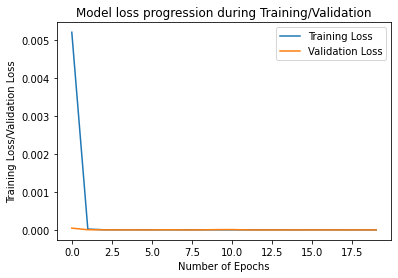

In [63]:
#Data plotting between training and validation loss
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progression during Training/Validation')
plt.ylabel('Training Loss/Validation Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

In [64]:
X_Testing=X_test

In [65]:
y_predict = model.predict(X_Testing)
y_predict.shape

(15203, 1)

In [66]:
print('R-square value/accuracy :' , r2_score(y_test, y_predict)*100 , "%")

R-square value/accuracy : 99.99921580170374 %
